In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipyexperiments import *
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from path import Path

In [2]:
MODELS = Path('./models/AWD_LSTM')
DATA = Path('./data')

df = pd.read_parquet(DATA / 'mbti_1.pqt', 'fastparquet')
train = df[df.is_valid == False]
val = df[df.is_valid == True]


In [4]:
exp1 = IPyExperimentsPytorch()

data_lm = load_data(MODELS,'data_lm_export.pkl')
learn = language_model_learner(data_lm, arch=AWD_LSTM )


*** Experiment started with the Pytorch backend
Device: ID 0, GeForce GTX 1070 (8117 RAM)


*** Current state:
RAM:    Used    Free   Total       Util
CPU:   2,778  48,954  64,352 MB   4.32% 
GPU:   1,600   6,517   8,117 MB  19.71% 


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.180
･ CPU:          0          0      2,778 MB |
･ GPU:          4          2      1,600 MB |

IPyExperimentsPytorch: Finishing

*** Experiment finished in 02:08:45 (elapsed wallclock time)

*** Newly defined local variables:
Deleted: data_lm

*** Experiment memory:
RAM: Consumed       Reclaimed
CPU:      329        4 MB (  1.35%)
GPU:        4        0 MB (  0.00%)

*** Current state:
RAM:    Used    Free   Total       Util
CPU:   2,774  48,958  64,352 MB   4.31% 
GPU:   1,600   6,517   8,117 MB  19.71% 


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:03.794
･ CPU:          0          0      2,859 MB |
･ GPU:        234          8      1,834 MB |


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


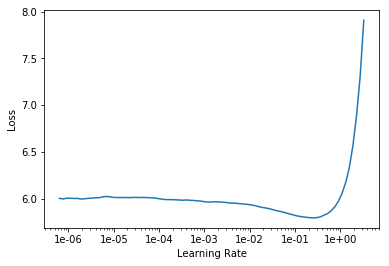

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:33.478
･ CPU:          0          2      2,888 MB |
･ GPU:        406      5,249      2,240 MB |


In [5]:
learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(1, 2e-02)
learn.unfreeze()
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,time
0,4.700811,4.366804,0.242623,15:23


epoch,train_loss,valid_loss,accuracy,time
0,4.469680,4.251969,0.253254,17:53
1,4.392018,4.133133,0.265819,17:40
2,4.264731,4.047349,0.274892,17:39
3,4.171680,3.991757,0.281432,17:28
4,4.139320,3.955577,0.285707,17:31
5,4.091193,3.927975,0.289342,17:30
6,4.067306,3.910633,0.291621,17:25
7,4.012954,3.898835,0.292884,17:27
8,3.989483,3.893325,0.293600,17:28
9,3.979686,3.892325,0.293740,17:37


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 3:11:05.809
･ CPU:          3          0      2,892 MB |
･ GPU:      1,425      4,229      3,666 MB |


In [9]:
learn.save('awd1')
learn.save_encoder('awd1')

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:12.600
･ CPU:          0          0      2,904 MB |
･ GPU:          0          0      4,111 MB |
